In [ ]:
import librosa
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/gunshot-audio-all-metadata.csv')

In [ ]:
# View metadata columns
print(metadata_df.columns)

Index(['filename', 'uuid', 'label', 'recording_session ', 'timestamp',
       'time_offset_s', 'device_name', 'device_manufacturer', 'device_model',
       'microphone', 'firearm', 'caliber', 'latitude', 'longitude',
       'gunshot_location_in_seconds', 'num_gunshots'],
      dtype='object')


In [ ]:
le = LabelEncoder()
metadata_df['uuid'] = le.fit_transform(metadata_df['uuid'])

In [ ]:
# Convert 'gunshot_location_in_seconds' to float if it's in string format
metadata_df['gunshot_location_in_seconds'] = pd.to_numeric(metadata_df['gunshot_location_in_seconds'], errors='coerce')

In [ ]:
X = metadata_df[['gunshot_location_in_seconds', 'uuid', 'num_gunshots']]  # Replace with relevant features
y = metadata_df['firearm']  # Replace with the firearm type column (e.g., 'handgun', 'rifle', etc.)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming 'firearm_type' is the column with categorical labels (e.g., firearm names)
le = LabelEncoder()
y_encoded = le.fit_transform(metadata_df['firearm'])  # Encode the labels

In [ ]:
# Train a classifier (e.g., RandomForest)
classifier = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.60%


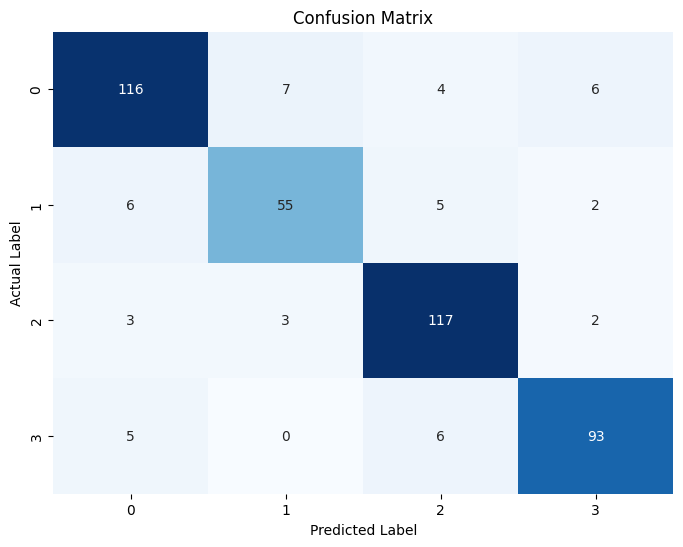

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Assuming X and y_encoded are your feature matrix and encoded labels
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y_encoded, cv=5)


In [ ]:
# Output the cross-validation accuracy
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')

Cross-Validation Accuracy: 36.55%


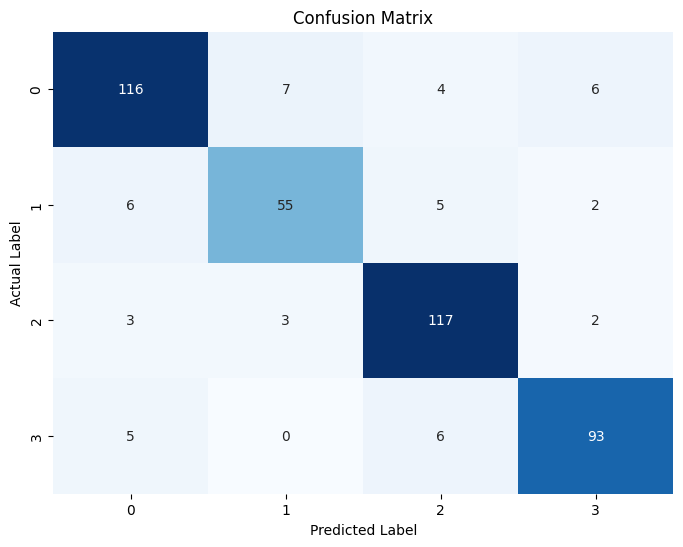

In [ ]:
import librosa
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load and preprocess audio files
def load_audio_files(audio_dir):
    X, y = [], []
    for label in os.listdir(audio_dir):
        label_dir = os.path.join(audio_dir, label)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                y_audio, sr = librosa.load(file_path, sr=None)
                # Extract features (Mel spectrogram)
                mel_spec = librosa.feature.melspectrogram(y_audio, sr=sr, n_mels=128)
                mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
                X.append(mel_spec_db)
                y.append(label)
    return np.array(X), np.array(y)

In [ ]:
# Load data
audio_dir = '/content/drive/MyDrive/ALL_gunshot'
X, y = load_audio_files(audio_dir)

In [ ]:
# Display the first few rows of the metadata to understand its structure
metadata_df.head()

,filename,uuid,label,recording_session,timestamp,time_offset_s,device_name,device_manufacturer,device_model,microphone,firearm,caliber,latitude,longitude,gunshot_location_in_seconds,num_gunshots
0,880b3ce5-9c19-4c12-a813-b223bb4f2897_v1,289,9mm,1,2021-11-15T12:46:11.907-04:00,17.614000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,NaN,1
1,fed855d4-d9c4-42c5-a5c5-ddc5edd69e14_v0,543,9mm,1,2021-11-15T12:47:41.122-04:00,17.614000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,NaN,1
2,369d77b1-3141-40e2-8fb5-77d57d560472_v0,127,9mm,1,2021-11-15T12:50:03.647-04:00,17.636999,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,NaN,3
3,cfe036af-d99f-46a5-8829-32a66b45be70_v1,446,9mm,1,2021-11-15T12:51:30.693-04:00,17.547001,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,NaN,3
4,b0f71933-ce93-45ae-bf09-6838af56c0ee_v0,382,9mm,1,2021-11-15T12:52:47.686-04:00,17.579000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,NaN,3


In [ ]:
import numpy as np
import pandas as pd

# Function to process different types of gunshot location entries
def process_gunshot_location(entry):
    if isinstance(entry, str):  # If it's a string, convert it into an array
        return np.fromstring(entry.strip('[]'), sep=' ')
    elif pd.notna(entry):  # If it's a number (float), wrap it in an array
        return np.array([entry])
    else:
        return np.zeros(1)  # For NaN or missing values, return an array with zero

# Apply the function to process the 'gunshot_location_in_seconds' column
X = np.array([process_gunshot_location(loc) for loc in metadata_df['gunshot_location_in_seconds']])

# Add the channel dimension (if needed)
X = np.array([x[..., np.newaxis] for x in X])

# Check the shape of X to ensure it's processed correctly
print(X.shape)


(2148, 1, 1)


In [ ]:
# Combine processed gunshot_location_in_seconds with num_gunshots
num_gunshots = metadata_df['num_gunshots'].values

# Stack features together (e.g., gunshot locations and number of gunshots)
X_combined = np.column_stack([X.squeeze(), num_gunshots])


In [ ]:
# Example: If there's a 'firearm_type' column in the metadata, use it as the labels
y = metadata_df['firearm']

# Check for unique labels (firearm types)
print(y.unique())


['Glock 17' 'Smith & Wesson' 'Ruger 556' 'Remington 870']


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2148, 1, 1)
y shape: (2148,)


In [ ]:
# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the RandomForest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 40.93%


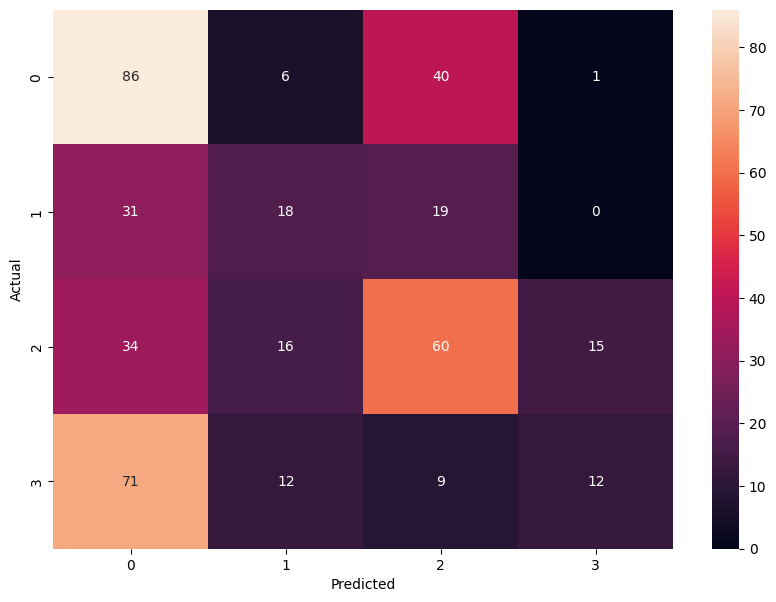

                precision    recall  f1-score   support

      Glock 17       0.39      0.65      0.48       133
 Remington 870       0.35      0.26      0.30        68
     Ruger 556       0.47      0.48      0.47       125
Smith & Wesson       0.43      0.12      0.18       104

      accuracy                           0.41       430
     macro avg       0.41      0.38      0.36       430
  weighted avg       0.41      0.41      0.38       430



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
